In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd


config = json.load(open("crb_validation_config.json"))
subcarrier_spacing = config.get("subcarrier_spacing")
subcarrier_num = config.get("subcarrier_num")
num_time_steps = config.get("num_time_steps")
ebno_db = config.get("ebno_db")
num_samples = config.get("num_samples")
batch_size = config.get("batch_size")
max_depth = config.get("max_depth")
step = config.get("step")
los = config.get("los")
reflection = config.get("reflection")
scattering = config.get("scattering")
diffraction = config.get("diffraction")
edge_diffraction = config.get("edge_diffraction")

scene_info = [
    {
        "scene_name":"indoor",
        "paths":["./scenes/Indoor/indoor1.xml","./scenes/Indoor/indoor.xml"],
        "tgname":["human1"],
        "tgv":[(0,0,0)],
        "map_center":[0,0,2.95],
        "map_size_x":10,
        "map_size_y":6,
        "cell_size":0.2,
        "look_at":[-3.37234,2.18367,1.20838],
    },
    {
        "scene_name":"indoor",
        "paths":["./scenes/Indoor/indoor2.xml","./scenes/Indoor/indoor.xml"],
        "tgname":["human2"],
        "tgv":[(0,0,0)],
        "map_center":[0,0,2.95],
        "map_size_x":10,
        "map_size_y":6,
        "cell_size":0.2,
        "look_at":[-2.81027,-1.92977,1.20838]
    },
    {
        "scene_name":"indoor",
        "paths":["./scenes/Indoor/indoor3.xml","./scenes/Indoor/indoor.xml"],
        "tgname":["human3"],
        "tgv":[(0,0,0)],
        "map_center":[0,0,2.95],
        "map_size_x":10,
        "map_size_y":6,
        "cell_size":0.2,
        "look_at":[2.97116,-0.235489,1.20838]
    }
]


def getRayType():
    ray_type=""
    if los:
        ray_type += "T"
    else:
        ray_type += "F"
    if reflection:
        ray_type += "T"
    else:
        ray_type += "F"
    if scattering:
        ray_type += "T"
    else:
        ray_type += "F"
    if diffraction:
        ray_type += "T"
    else:
        ray_type += "F"
    if edge_diffraction:
        ray_type += "T"
    else:
        ray_type += "F"
    return ray_type



Text(0.5, 1.0, 'mse-crb diff hist,mean=259.52,var=55180.30,per=0.70')

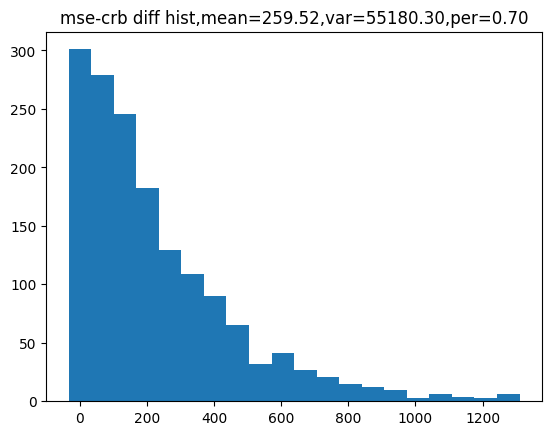

In [4]:
info = scene_info[2]
scene_name = info.get("scene_name")
scene1 = info.get("paths")[0]
scene_env = info.get("paths")[1]
map_center = info.get("map_center")
x = info.get("map_size_x")
y = info.get("map_size_y")
cell_size = info.get("cell_size")
look_at = info.get("look_at")
tgname = info.get("tgname")
tgv = info.get("tgv")
look_at = info.get("look_at")
ray_type = getRayType()
title = f"./Data/{scene_name}/{tgname[0]}/{tgv[0]}/{num_samples}-{ray_type}-{max_depth}-{x}-{y}-{cell_size}"

mse = np.load(f"{title}/mse_{step}.npy")
crb = np.load(f"{title}/crb_{batch_size}.npy")
mask_greater = np.where(mse>=1)
mask_less = np.where(mse<1)
mse[mask_greater] = np.max(mse[mask_less])
mask_zero = np.where(crb==0)
crb[mask_zero] = 1e-7

# 排序并得到索引
mse_sort = np.argsort(mse)
crb_sort = np.argsort(crb)

# 做差取平均
diff = mse_sort - crb_sort
diff = np.abs(diff)

# 做频率直方图
hist = np.histogram(diff, bins=20)
plt.bar(hist[1][:-1], hist[0], width=hist[1][1]-hist[1][0])
per = len(np.where(diff<=len(diff)/5)[0])/len(diff)
mean = np.mean(diff)
var = np.var(diff)
plt.title(f"mse-crb diff hist,mean={mean:.2f},var={var:.2f},per={per:.2f}")